In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [7]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [8]:
# function to download all listings data
def get_listings_madrid_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Madrid')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/madrid_{date}.csv',index=False)
get_listings_madrid_timeseries()

In [9]:
# pull in detailed_listings
raw_df_madrid = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_madrid)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(madrid_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17634 AirBnb listings.


In [10]:
madrid_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2020-12.csv')
madrid_raw_df_12_12_2020.shape





(20352, 16)

In [11]:
# use magic commands 'cd' to change directory
# use glob to locate all files for madrid
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_madrid = glob.glob('madrid/**.csv')
files_madrid

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['madrid/Madrid_2021-02.csv',
 'madrid/Madrid_2021-03.csv',
 'madrid/Madrid_2021-01.csv',
 'madrid/Madrid_2021-10.csv',
 'madrid/Madrid_2021-04.csv',
 'madrid/Madrid_2021-11.csv',
 'madrid/Madrid_2021-07.csv',
 'madrid/Madrid_2021-06.csv',
 'madrid/Madrid_2021-08.csv',
 'madrid/Madrid_2021-09.csv',
 'madrid/Madrid_2020-12.csv']

In [12]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

madrid_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(madrid_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(madrid_raw_df_12_12_2020['price'].mean(),2)}.")

madrid_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(madrid_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_1_9_2021['price'].mean(),2)}.")

madrid_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(madrid_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_2_8_2021['price'].mean(),2)}.")

madrid_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(madrid_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_3_4_2021['price'].mean(),2)}.")

madrid_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(madrid_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_4_9_2021['price'].mean(),2)}.")

#madrid_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(madrid_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_5_19_2021['price'].mean(),2)}.")

madrid_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(madrid_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_6_3_2021['price'].mean(),2)}.")

madrid_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(madrid_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_7_4_2021['price'].mean(),2)}.")

madrid_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(madrid_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_8_6_2021['price'].mean(),2)}.")

madrid_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(madrid_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_9_7_2021['price'].mean(),2)}.")

madrid_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(madrid_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_10_6_2021['price'].mean(),2)}.")

#madrid_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/madrid/madrid_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(madrid_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(madrid_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20352 AirBnb listings; the avg price is €115.76.
The 1_9_2021 dataset contains 20151 AirBnb listings; the avg price is €123.1.
The 2_8_2021 dataset contains 20156 AirBnb listings; the avg price is €127.07.
The 3_4_2021 dataset contains 20007 AirBnb listings; the avg price is €126.28.
The 4_9_2021 dataset contains 19618 AirBnb listings; the avg price is €129.27.
The 6_3_2021 dataset contains 19478 AirBnb listings; the avg price is €129.88.
The 7_4_2021 dataset contains 19612 AirBnb listings; the avg price is €128.04.
The 8_6_2021 dataset contains 19664 AirBnb listings; the avg price is €124.3.
The 9_7_2021 dataset contains 18909 AirBnb listings; the avg price is €129.57.
The 10_6_2021 dataset contains 17989 AirBnb listings; the avg price is €135.09.


In [13]:
df_list_madrid = [madrid_raw_df_12_12_2020, madrid_raw_df_1_9_2021, madrid_raw_df_2_8_2021,
           madrid_raw_df_3_4_2021, madrid_raw_df_4_9_2021, madrid_raw_df_6_3_2021, madrid_raw_df_7_4_2021,
           madrid_raw_df_8_6_2021, madrid_raw_df_9_7_2021, madrid_raw_df_10_6_2021]

dates_madrid = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_madrid = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_madrid = []

def airbnb_parse_madrid(df_list, files):
    for file in files_madrid:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/madrid/madrid_{file}.csv")
        print(f"The {file} madrid dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_madrid(df_list, dates):
    for file in files_madrid:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/madrid/madrid_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_madrid.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_madrid)

madrid_parse = airbnb_parse_madrid(df_list_madrid, files_madrid)


The 2020-12 madrid dataset contains 20352 AirBnb listings -- the avg price is €115.76.
The 2021-01 madrid dataset contains 20151 AirBnb listings -- the avg price is €123.1.
The 2021-02 madrid dataset contains 20156 AirBnb listings -- the avg price is €127.07.
The 2021-03 madrid dataset contains 20007 AirBnb listings -- the avg price is €126.28.
The 2021-04 madrid dataset contains 19618 AirBnb listings -- the avg price is €129.27.
The 2021-06 madrid dataset contains 19478 AirBnb listings -- the avg price is €129.88.
The 2021-07 madrid dataset contains 19612 AirBnb listings -- the avg price is €128.04.
The 2021-08 madrid dataset contains 19664 AirBnb listings -- the avg price is €124.3.
The 2021-09 madrid dataset contains 18909 AirBnb listings -- the avg price is €129.57.
The 2021-10 madrid dataset contains 17989 AirBnb listings -- the avg price is €135.09.


In [14]:
madrid_summary = airbnb_to_frame_madrid(df_list_madrid, files_madrid)
madrid_summary['Date of scrape'] = pd.to_datetime(madrid_summary['Date of scrape'])
madrid_summary['City'] = 'madrid'
madrid_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,20352,115.76,59.0,0,9999,1.18,madrid
1,2021-01-01,20151,123.10,56.0,0,9999,1.17,madrid
2,2021-02-01,20156,127.07,57.0,0,9999,1.14,madrid
3,2021-03-01,20007,126.28,58.0,0,9999,1.13,madrid
4,2021-04-01,19618,129.27,58.0,0,9999,1.13,madrid
5,2021-06-01,19478,129.88,60.0,0,9999,1.14,madrid
6,2021-07-01,19612,128.04,60.0,0,9999,1.15,madrid
7,2021-08-01,19664,124.30,60.0,0,9999,1.19,madrid
8,2021-09-01,18909,129.57,64.0,0,9999,1.22,madrid
9,2021-10-01,17989,135.09,70.0,0,9999,1.29,madrid


In [15]:
master_df_madrid = pd.concat(df_list_madrid)
master_df_madrid_unique = master_df_madrid.drop_duplicates(subset='id')
master_df_madrid_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.59,1,90,NaN,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,2018-07-15,0.44,2,364,NaN,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,15,0,NaN,NaN,6,292,NaN,NaN
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,101,5,10,2020-03-01,0.14,1,88,NaN,NaN
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.58,1,358,NaN,NaN


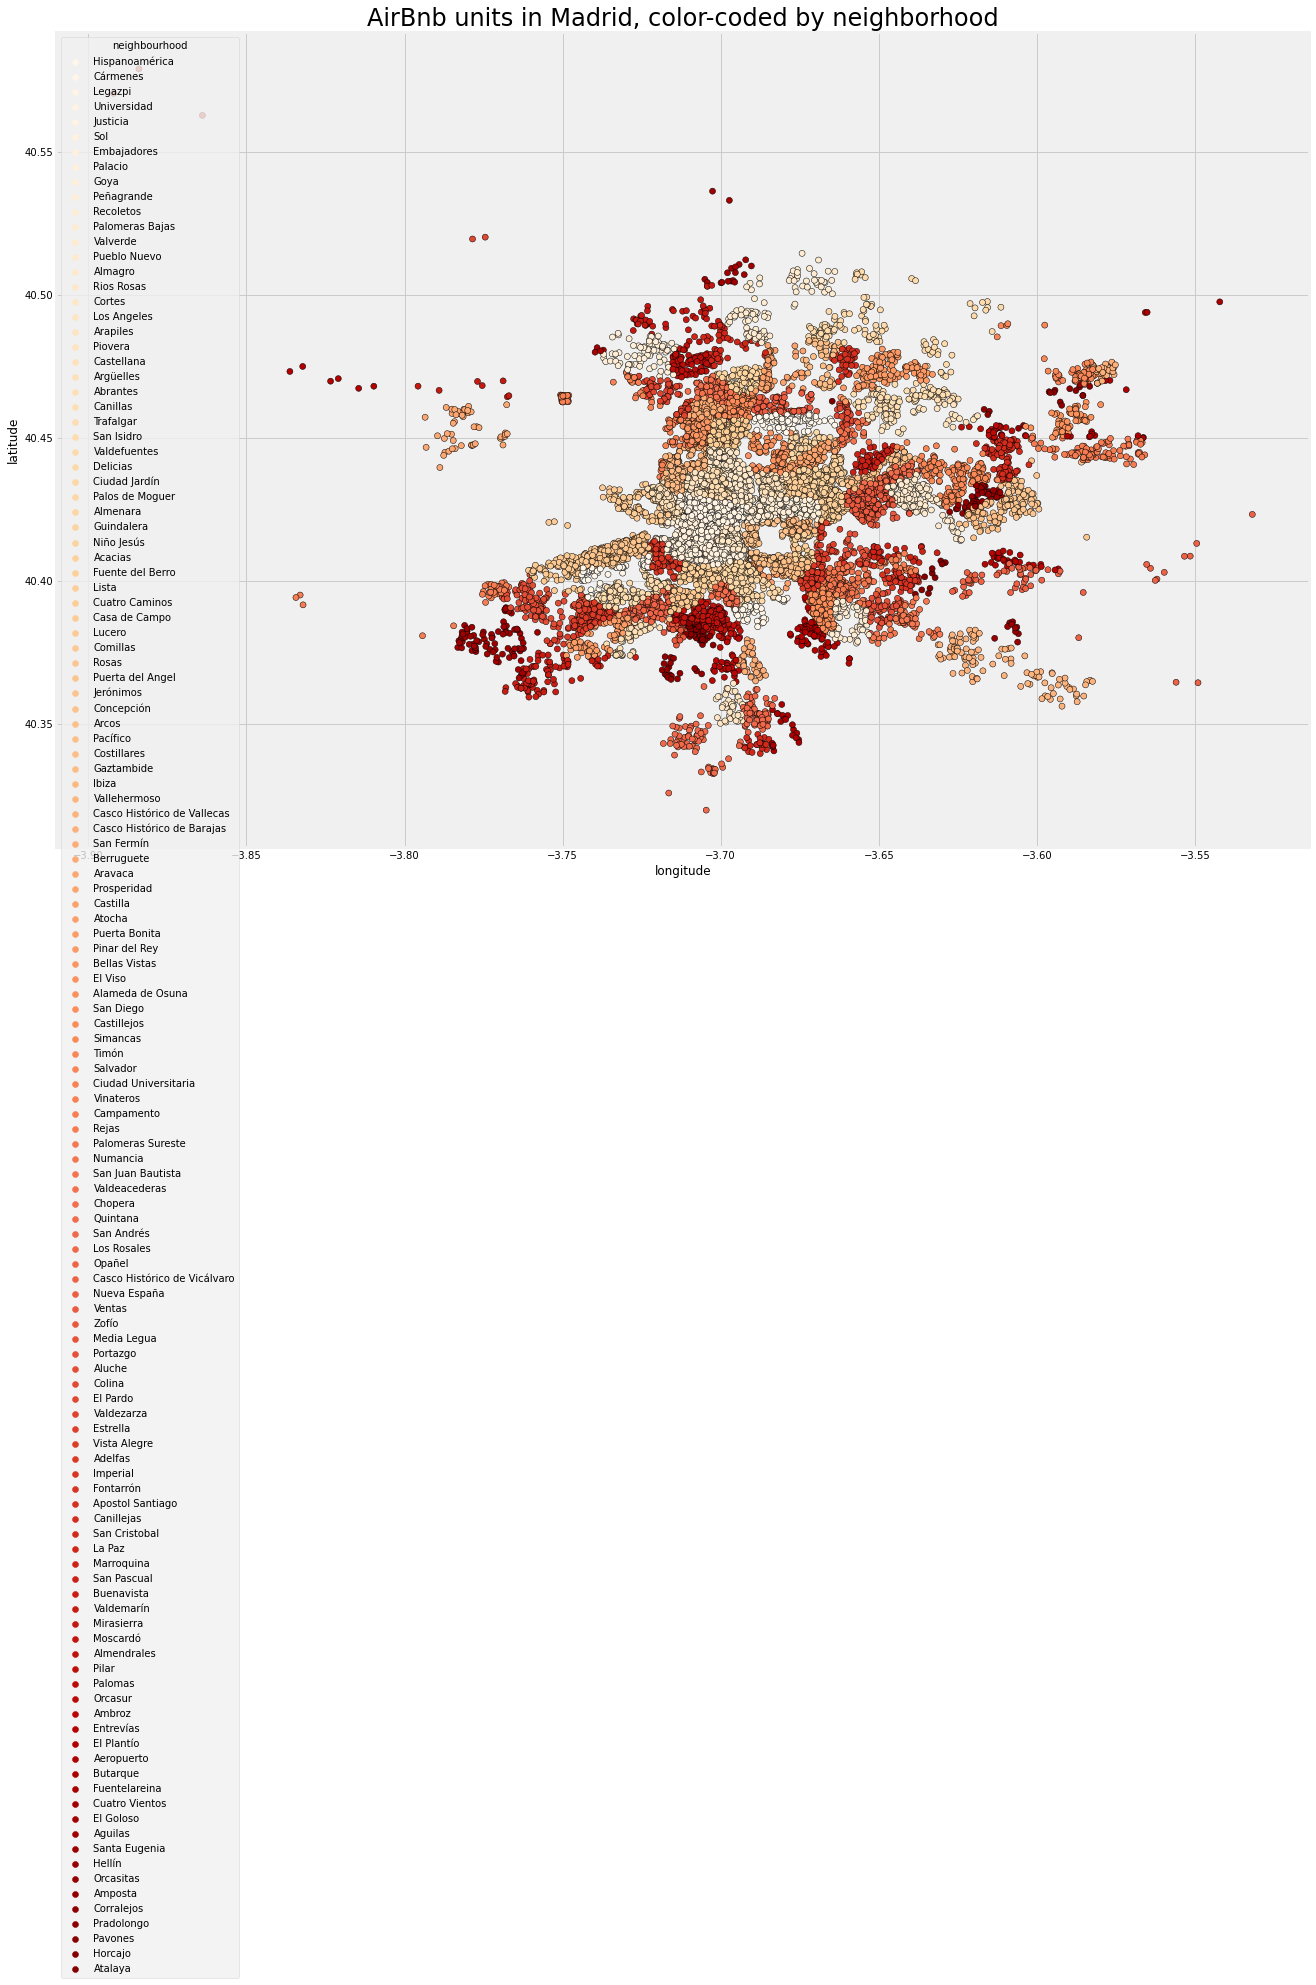

In [16]:
title = 'AirBnb units in Madrid, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_madrid_unique.longitude, master_df_madrid_unique.latitude, hue = master_df_madrid_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_madrid.png')
plt.show()

## Add review data through a join

In [17]:
df_reviews = pd.concat([madrid_raw_df_10_6_2021,raw_df_madrid],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,...,4.91,4.81,4.80,4.89,4.77,4.85,f,0.0,1.0,0.0
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.403410,-3.740840,Private room,31,...,4.72,4.56,4.75,4.82,4.21,4.67,f,0.0,2.0,0.0
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.386950,-3.693040,Entire home/apt,50,...,NaN,NaN,NaN,NaN,NaN,NaN,f,5.0,1.0,0.0
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.422020,-3.703950,Entire home/apt,92,...,4.75,4.83,5.00,5.00,5.00,4.83,f,1.0,0.0,0.0
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.389750,-3.690180,Private room,29,...,4.81,4.92,4.78,4.71,4.70,4.72,f,0.0,1.0,0.0
5,28200,Apartamento Arganzuela Planetario,82175,Jesus,Arganzuela,Legazpi,40.388410,-3.695050,Entire home/apt,85,...,4.33,4.33,4.83,4.50,4.33,4.50,f,5.0,1.0,0.0
6,30320,Great Vacational Apartments,130907,Dana,Centro,Sol,40.415520,-3.703460,Entire home/apt,65,...,4.14,4.38,4.63,4.63,4.88,4.25,f,1.0,0.0,0.0
7,30959,Beautiful loft in Madrid Center,132883,Angela,Centro,Embajadores,40.411110,-3.702690,Entire home/apt,54,...,NaN,NaN,NaN,NaN,NaN,NaN,f,1.0,2.0,0.0
8,37859,"PISO, OPERA, MADRID, GRANDE",162701,Nacho,Centro,Palacio,40.418440,-3.710730,Entire home/apt,1400,...,4.71,4.67,4.54,4.86,4.95,4.67,t,9.0,0.0,0.0
9,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CHUECA,34217435,Luis,Centro,Justicia,40.419780,-3.697300,Entire home/apt,85,...,4.88,4.86,4.86,4.82,4.90,4.78,f,2.0,0.0,0.0


## Regression

In [18]:
#df_reviews_.columns

In [19]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [20]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  89.21025674796263
Coefficients:  [ -4.31083516  -1.81474653   6.39722362   0.2108979   -1.40216125
   7.55734813  21.10633564  -2.48429304 -15.80242708]
LinearRegression()


In [21]:
y_pred2 = regr.predict(X_)

In [22]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
10012,400,105.189531,-294.810469
16530,380,85.664348,-294.335652
12085,400,112.748736,-287.251264
9823,400,116.726335,-283.273665
12062,400,118.658464,-281.341536


<function matplotlib.pyplot.ylim(*args, **kwargs)>

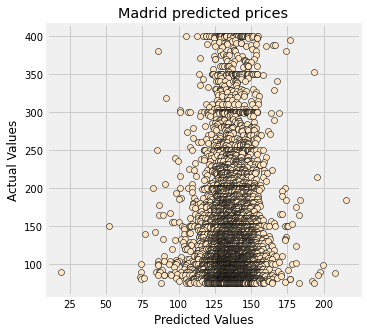

In [23]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Madrid predicted prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim